# Stacking model 
(Base model: XGBoost, Linear Regression; Metal model: Linear Regression)

EUR_VND

EUR_7:3

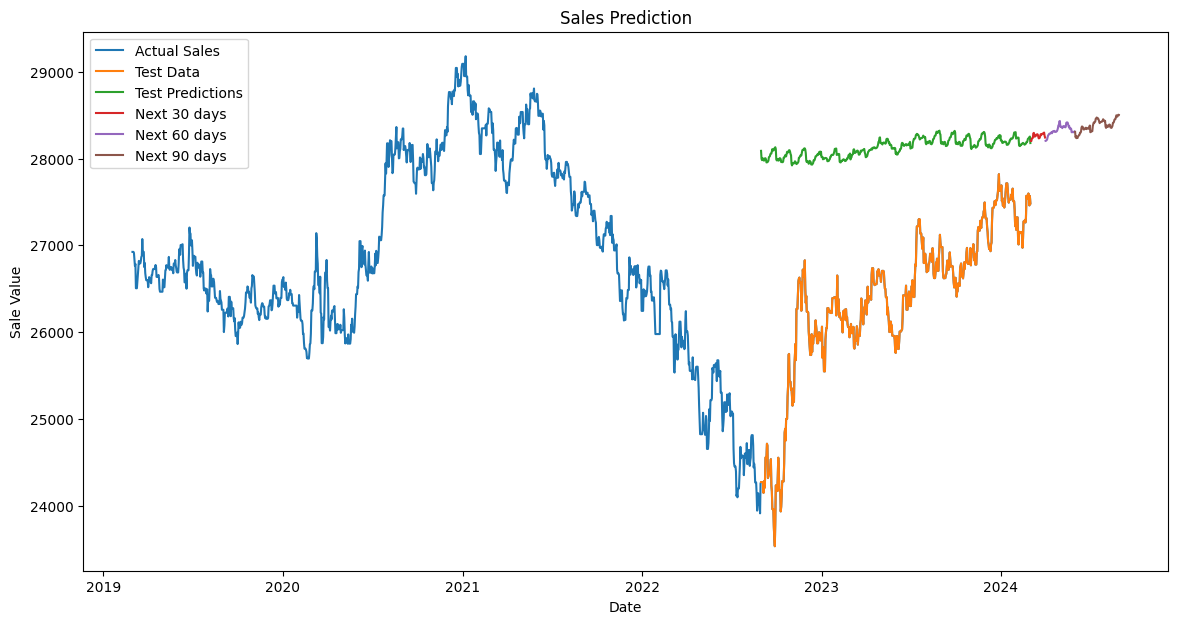

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('EUR_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.3, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 1928.6676893147455
MAE: 1750.8730251597974
MAPE: 6.751266227283896


EUR_8:2

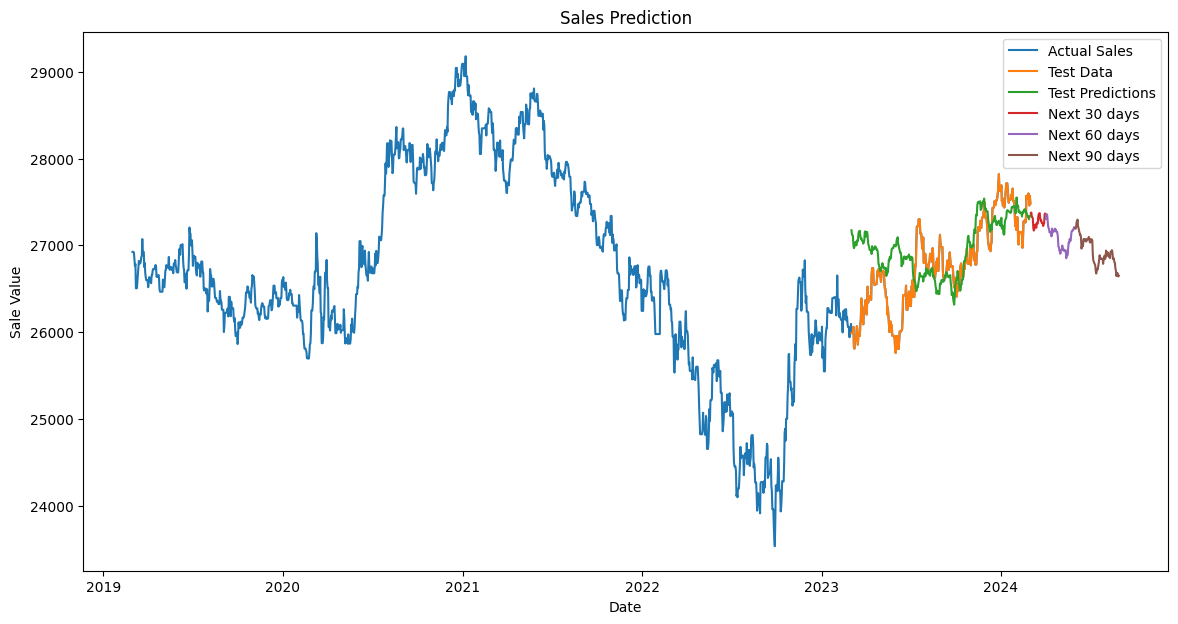

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('EUR_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 493.81469881221017
MAE: 372.9733314778207
MAPE: 1.407434574147827


EUR_9:1

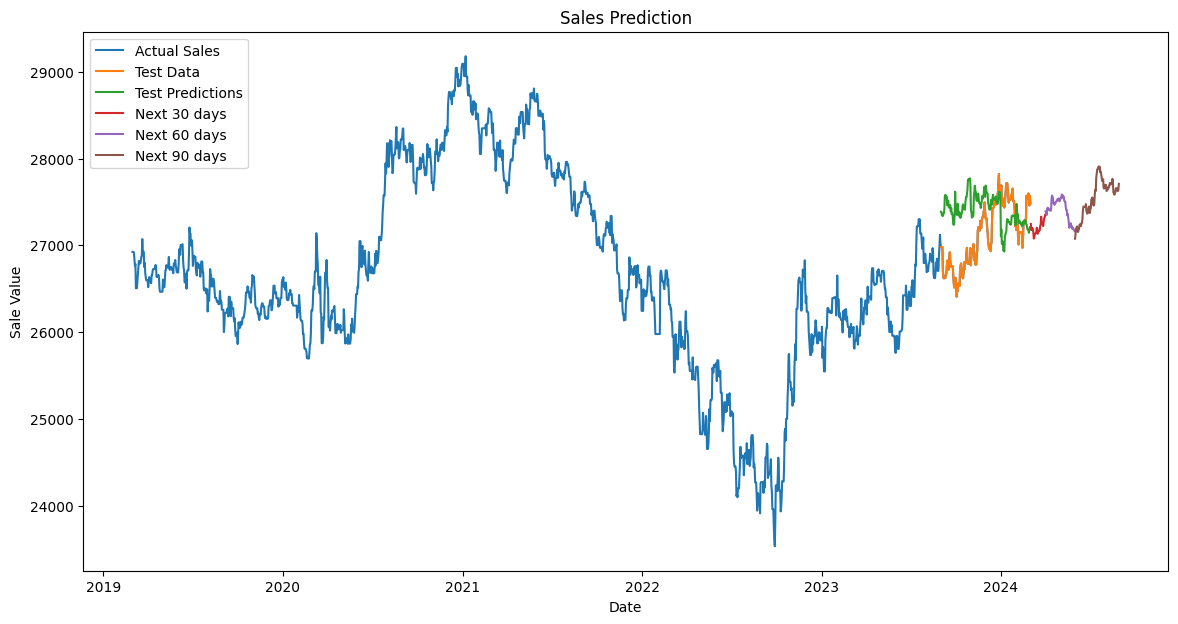

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('EUR_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.1, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 521.9508121580698
MAE: 440.76995828376937
MAPE: 1.635910888306542


GBP_7:3

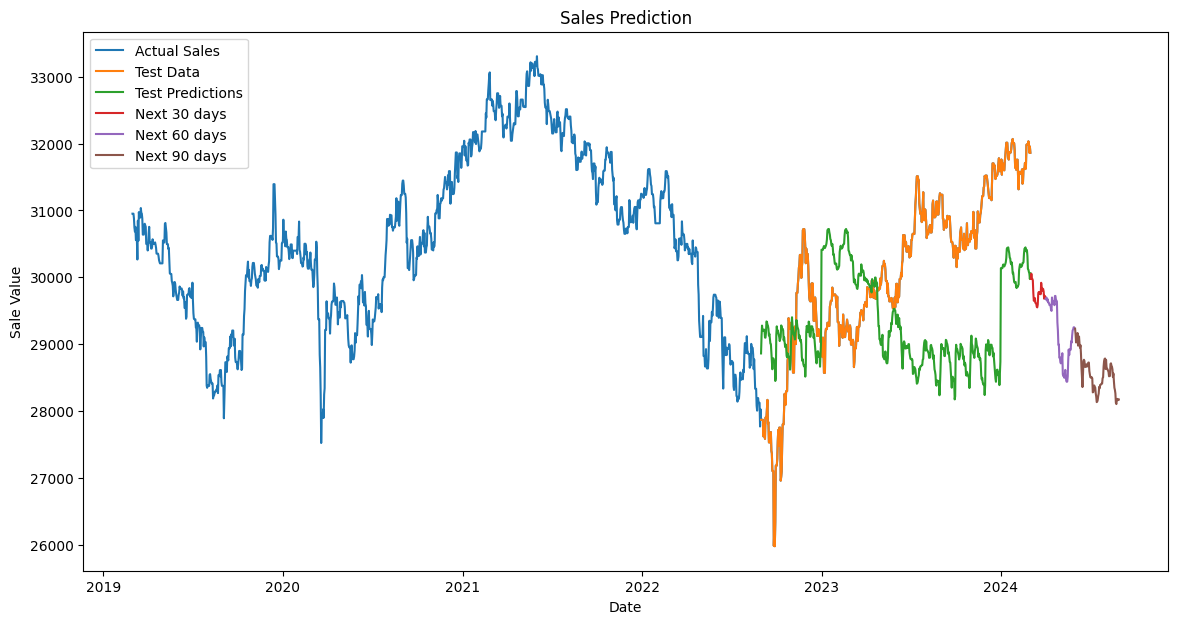

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('GBP_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.3, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 1620.4528688568985
MAE: 1429.0370184963695
MAPE: 4.713103310147474


GBP_8:2

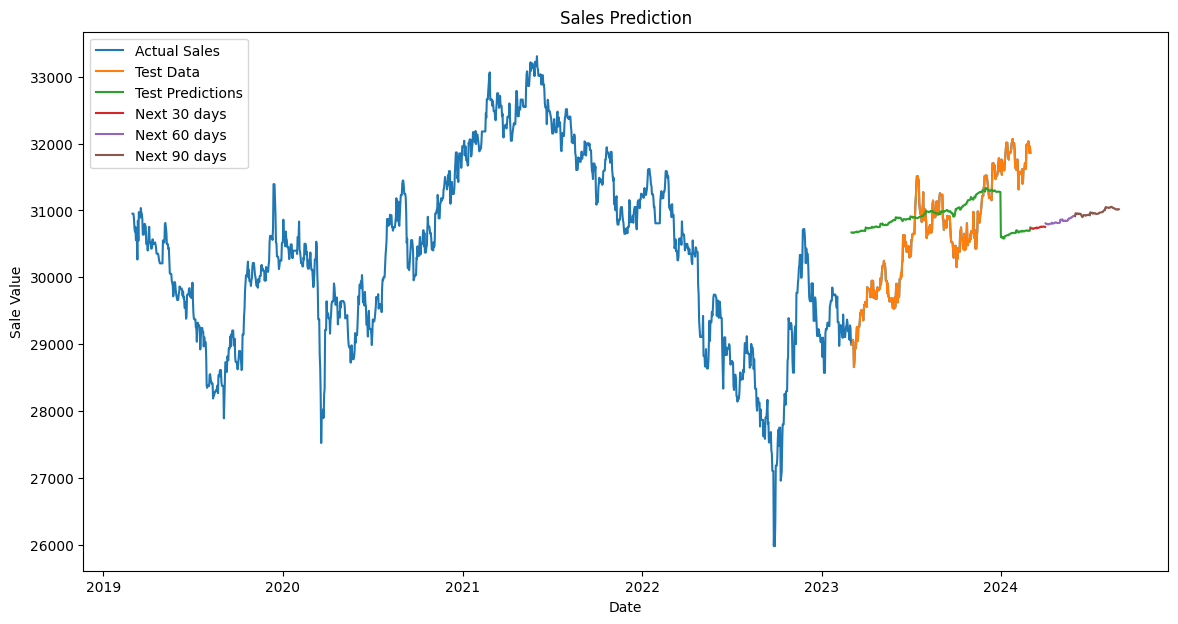

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('GBP_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 817.089498849545
MAE: 680.450355205255
MAPE: 2.2341647951038976


GBP_9:1

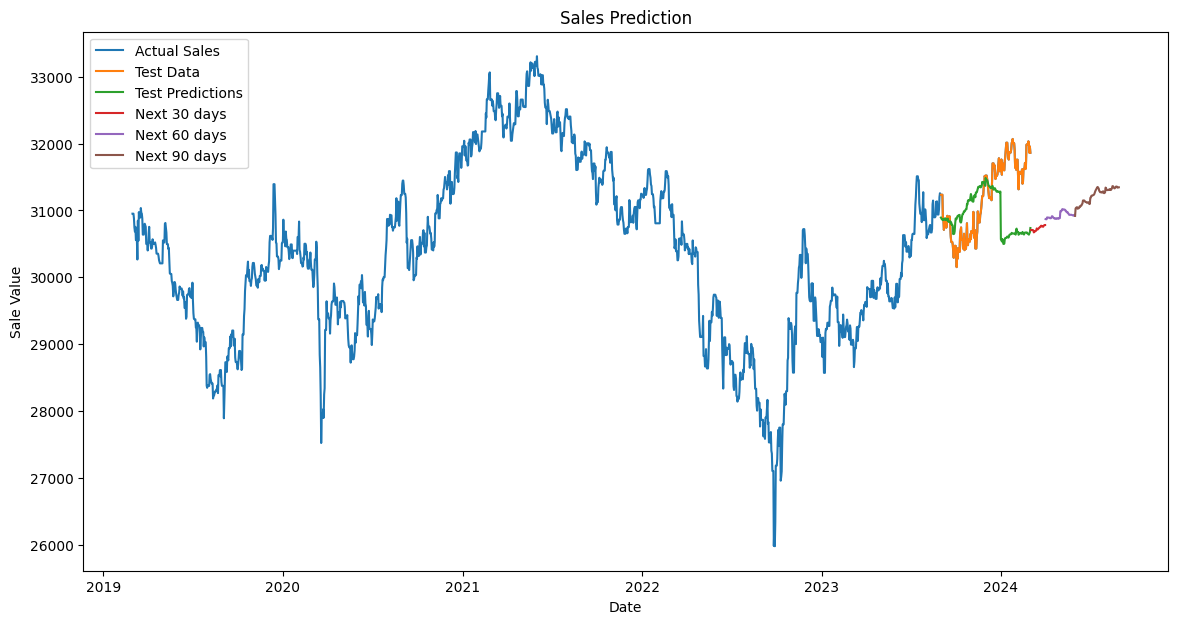

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('GBP_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.1, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 733.8445489456016
MAE: 594.5975429788905
MAPE: 1.8928218293763694


JPY_7:3

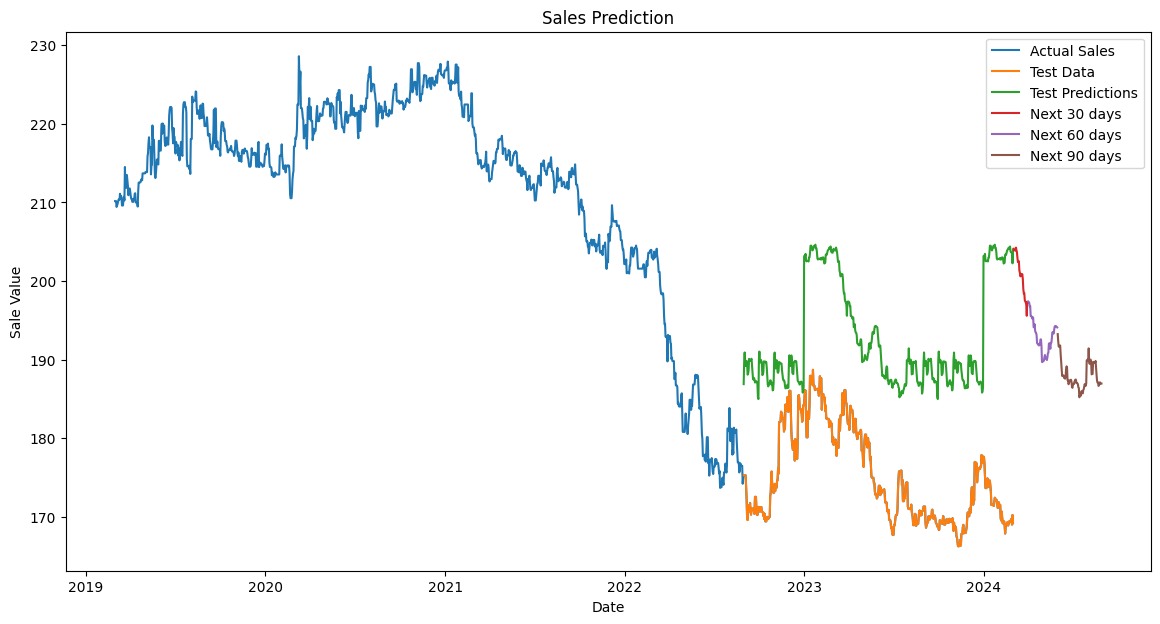

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('JPY_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.3, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [ ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 18.935247499633906
MAE: 17.64418635904354
MAPE: 10.149346667211676


JPY_8:2

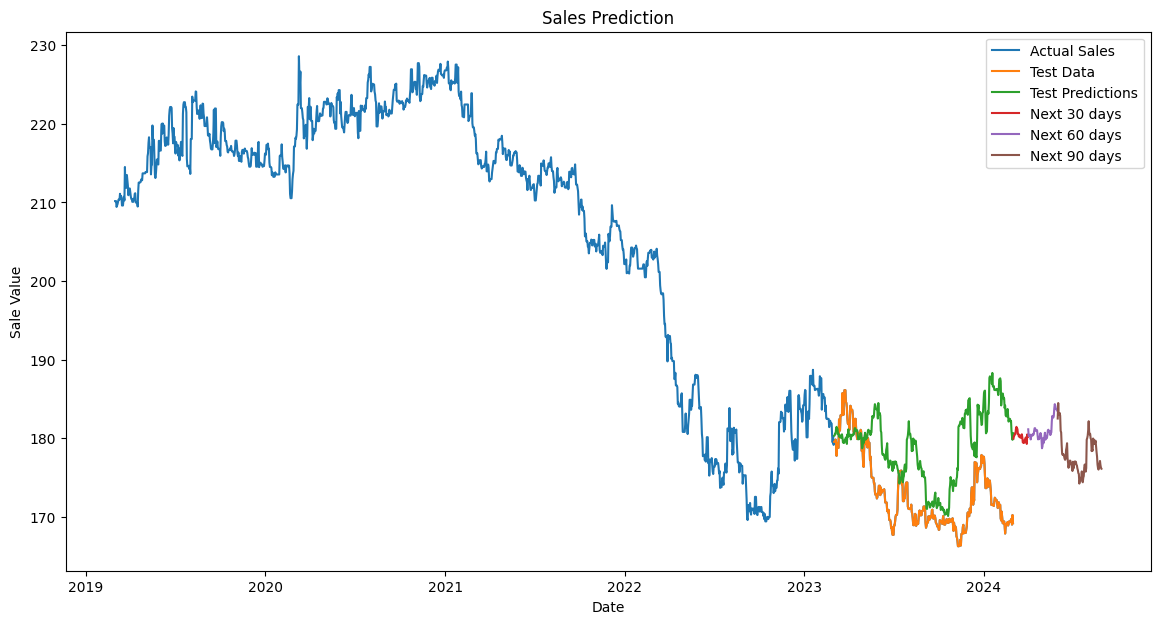

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('JPY_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [ ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 8.16300918870243
MAE: 6.546745210830479
MAPE: 3.8181083332545254


JPY_9:1

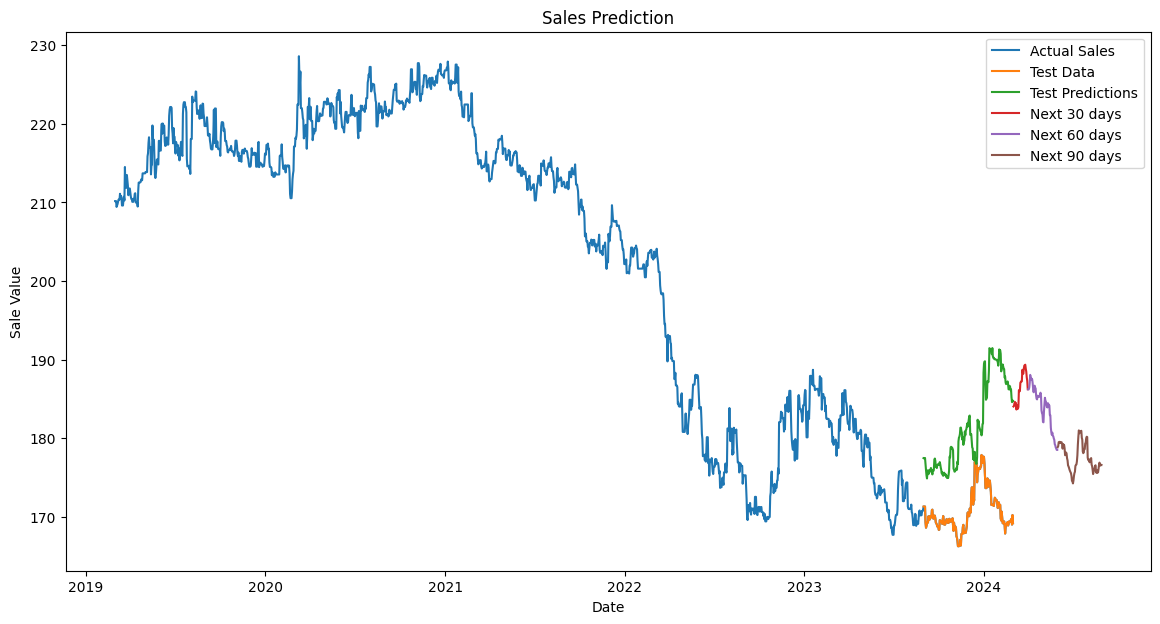

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('JPY_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.1, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [('linear', lr_model), ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 11.974069157257603
MAE: 10.704204007404433
MAPE: 6.280061494854001


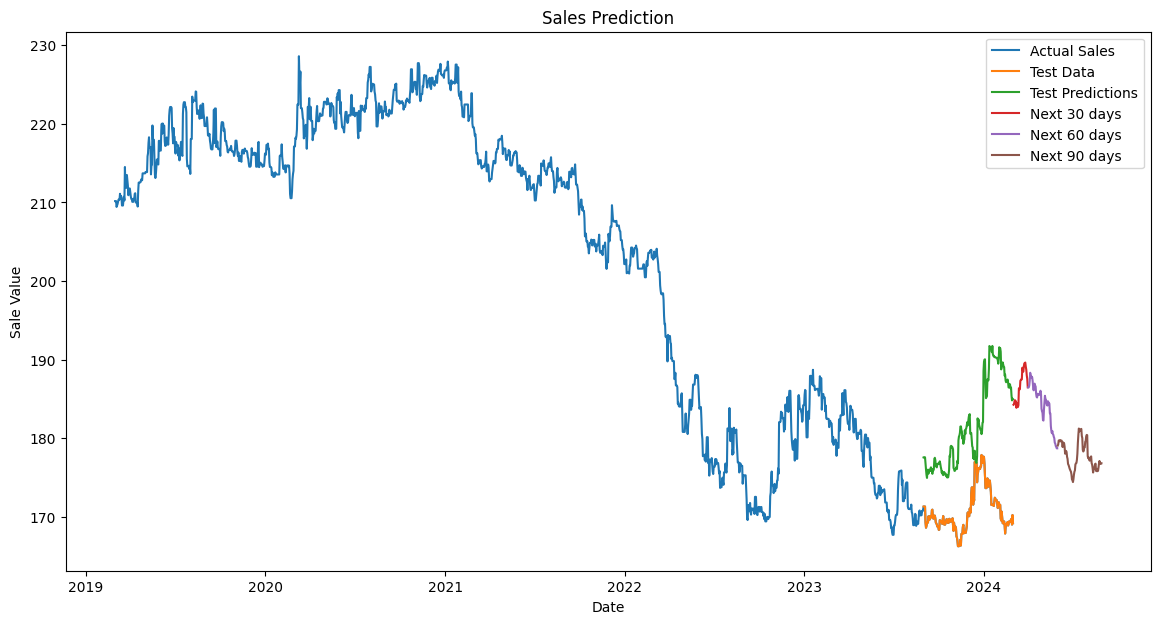

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('JPY_VND.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Chia dữ liệu thành tập huấn luyện (train) và tập thử nghiệm (test) theo tỷ lệ 80%/20% và giữ nguyên thứ tự thời gian
train, test = train_test_split(data, test_size=0.1, shuffle=False)

# Chọn các cột tính năng (feature) và mục tiêu (target)
X_train = train.drop(['Sale', 'Date'], axis=1)
y_train = train['Sale']
X_test = test.drop(['Sale', 'Date'], axis=1)
y_test = test['Sale']

# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Tạo mô hình Stacking
estimators = [ ('xgboost', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Scale dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện lại mô hình stacking với dữ liệu đã scale
stacking_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập dữ liệu thử nghiệm
stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

# Tạo DataFrame cho dự đoán của tập thử nghiệm
test_predictions_scaled = pd.DataFrame({
    'Date': test['Date'],
    'Sale': stacking_predictions_test_scaled
})

# Dự đoán giá trị tương lai bằng mô hình stacking
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
future_features_scaled = scaler.transform(future_features)
future_predictions_scaled = stacking_model.predict(future_features_scaled)

# Tạo DataFrame cho dự đoán tương lai
future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

# Dự đoán giá trị tương lai thêm 60 ngày và 90 ngày
future_dates_60 = pd.date_range(start=future_dates[-1] + pd.Timedelta(days=1), periods=60, freq='D')
future_features_60 = pd.DataFrame({'Year': future_dates_60.year, 'Month': future_dates_60.month, 'Day': future_dates_60.day})
future_features_60_scaled = scaler.transform(future_features_60)
future_predictions_60_scaled = stacking_model.predict(future_features_60_scaled)

future_dates_90 = pd.date_range(start=future_dates_60[-1] + pd.Timedelta(days=1), periods=90, freq='D')
future_features_90 = pd.DataFrame({'Year': future_dates_90.year, 'Month': future_dates_90.month, 'Day': future_dates_90.day})
future_features_90_scaled = scaler.transform(future_features_90)
future_predictions_90_scaled = stacking_model.predict(future_features_90_scaled)

# Tạo DataFrame cho dự đoán 60 ngày tiếp theo và 90 ngày tiếp theo
future_data_60_scaled = pd.DataFrame({'Date': future_dates_60, 'Sale': future_predictions_60_scaled})
future_data_90_scaled = pd.DataFrame({'Date': future_dates_90, 'Sale': future_predictions_90_scaled})

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 30 days', linestyle='-')
plt.plot(future_data_60_scaled['Date'], future_data_60_scaled['Sale'], label='Next 60 days', linestyle='-')
plt.plot(future_data_90_scaled['Date'], future_data_90_scaled['Sale'], label='Next 90 days', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.title('Sales Prediction')
plt.legend()
plt.show()



In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

# Tính toán MAE
mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 12.142784552925965
MAE: 10.86212758548924
MAPE: 6.372389109978363
